# Telecom Customer Segmentation Churn Project

**What means Churn ?**

Churn refers to when a customer **stops using telecom a service** and switches to another provider. The goal of a Telecom Customer Segmentation Churn Project is to **predict which customers are likely to leave** so companies can take actions to retain them.


***Objective*** - Identify factors that cause customer churn and build a model to predict churn.

***Impact*** - Helps companies reduce churn by offering targeted promotions, better service, or personalized customer support.

This dataset contains **13 columns** and **15000 rows**.
Description of the features is -
1.  **CustomerID** - Unique id for each customer
2.  **Age** - Age of customer
3.  **Gender** - Gender of customer
4.  **Tenure** - How long customer has been with the provider
5.  **Monthly Charges** - Monthly bill amount
6.  **Total Charges** - Total amount paid by the customer
7.  **Contract Type** - Type of contract('Two year', 'One year', 'Month-to-month')
8.  **Has Internet Service** - Type of internet service customer has('No', 'DSL', 'Fiber optic')
9.  **Has Device Protection Plan** - A device protection plan covers damage, theft or malfunctions(yes/no).
10. **Number of Complaints Last Year** - The no of customer's complaint in last year.
11. **Churn** - Whether the customer left or not(yes/no).
12. **Region** - The geographical area where the customer is located('South', 'East', 'North', 'West')


In [5]:
import pandas as pd   #for data manipulation
import numpy as np     #for numerical operations and multi dimensional array     
import seaborn as sns      #for advanced visualizations
import matplotlib.pyplot as plt   #for visualizations

## *Exploratory Data Analysis(EDA)*

**EDA is the process of analyzing and summarizing a dataset to understand its patterns, relationships, and key insights before applying machine learning models.**

Steps of EDA:
1. **Understanding Data** - Checking the shape, column names and types.
2. **Handling Missing Values** - Finding anf filling/removing missing data.
3. **Checking for Duplicates** - Identifying and duplicate records.
4. **Summarizing Data** - Using describe(), info(), and value counts.
5. **Detecting Outliers** - Using box plots and statistical methods.
6. **Analyzing Relationships** - Using correlation matrices
7. **Visualizing Data** - Using various charts

In [7]:
#reading csv file using pandas
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Telecom_Customer_Segmentation_Churn_Dataset.csv")

In [8]:
df.head()   #displaying first five rows

,CustomerID,Age,Gender,Tenure,Monthly Charges,Total Charges,Contract Type,Has Internet Service,Has Online Security Service,Has Device Protection Plan,Number of Complaints Last Year,Churn,Region
0,1,56,Female,41,78.22,5706.78,Two year,No,Yes,Yes,0,1,South
1,2,69,Male,55,120.48,790.58,One year,DSL,Yes,No,9,0,East
2,3,46,Female,7,90.26,3419.78,One year,No,No,Yes,8,0,South
3,4,32,Male,18,74.50,806.20,Two year,DSL,No,No,4,0,South
4,5,60,Female,43,46.38,1568.84,Month-to-month,Fiber optic,No,Yes,5,0,North


In [9]:
df.shape      #checking no of rows and columns in dataset

(15000, 13)

In [10]:
df.nunique()     #checking unique in each column 

CustomerID                        15000
Age                                  52
Gender                                3
Tenure                               71
Monthly Charges                    7759
Total Charges                     14834
Contract Type                         3
Has Internet Service                  3
Has Online Security Service           2
Has Device Protection Plan            2
Number of Complaints Last Year       10
Churn                                 2
Region                                4
dtype: int64

In [11]:
df.info()   #column names, non-null values, data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      15000 non-null  int64  
 1   Age                             15000 non-null  int64  
 2   Gender                          15000 non-null  object 
 3   Tenure                          15000 non-null  int64  
 4   Monthly Charges                 15000 non-null  float64
 5   Total Charges                   15000 non-null  float64
 6   Contract Type                   15000 non-null  object 
 7   Has Internet Service            15000 non-null  object 
 8   Has Online Security Service     15000 non-null  object 
 9   Has Device Protection Plan      15000 non-null  object 
 10  Number of Complaints Last Year  15000 non-null  int64  
 11  Churn                           15000 non-null  int64  
 12  Region                          

In [12]:
df.duplicated().sum()     #checking duplicates 

0

In [13]:
df.isnull().sum()     #checking null values

CustomerID                        0
Age                               0
Gender                            0
Tenure                            0
Monthly Charges                   0
Total Charges                     0
Contract Type                     0
Has Internet Service              0
Has Online Security Service       0
Has Device Protection Plan        0
Number of Complaints Last Year    0
Churn                             0
Region                            0
dtype: int64

In [14]:
df.describe()     #statistical summary of numerical columns

,CustomerID,Age,Tenure,Monthly Charges,Total Charges,Number of Complaints Last Year,Churn
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,43.452667,35.996067,80.517022,2898.212717,4.469200,0.292867
std,4330.271354,14.910732,20.509132,29.155010,2042.690053,2.882754,0.455093
min,1.000000,18.000000,1.000000,30.000000,30.080000,0.000000,0.000000
25%,3750.750000,31.000000,18.000000,55.417500,1254.250000,2.000000,0.000000
50%,7500.500000,43.000000,36.000000,80.495000,2479.530000,4.000000,0.000000
75%,11250.250000,56.000000,54.000000,105.800000,4226.795000,7.000000,1.000000
max,15000.000000,69.000000,71.000000,130.980000,9219.980000,9.000000,1.000000


In [15]:
df["Churn"].value_counts()   #checking each value in a column

Churn
0    10607
1     4393
Name: count, dtype: int64

**This dataset has class imbalance beacause the number of not churn(10607) is significantly higher than churn(4393).**

In [17]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Monthly Charges',
       'Total Charges', 'Contract Type', 'Has Internet Service',
       'Has Online Security Service', 'Has Device Protection Plan',
       'Number of Complaints Last Year', 'Churn', 'Region'],
      dtype='object')

In [18]:
categorical_columns = ['Region','Churn','Has Internet Service','Has Online Security Service', 'Has Device Protection Plan','Gender','Contract Type']
numerical_columns = ['Age','Monthly Charges','Tenure','Total Charges','Number of Complaints Last Year']

### **Univariate Analysis of Categorical columns**

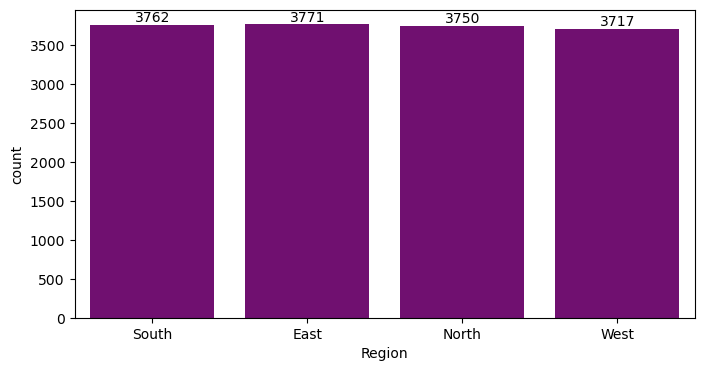

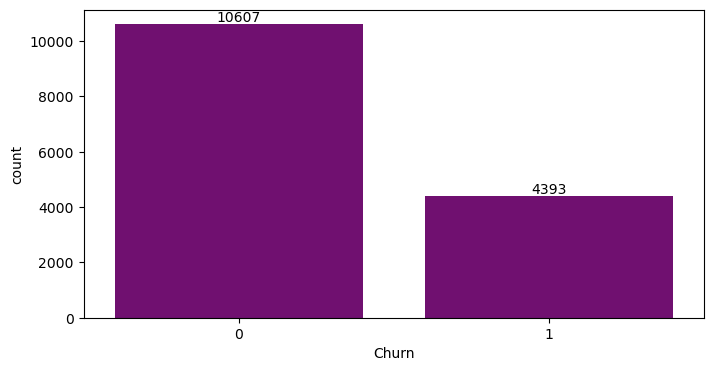

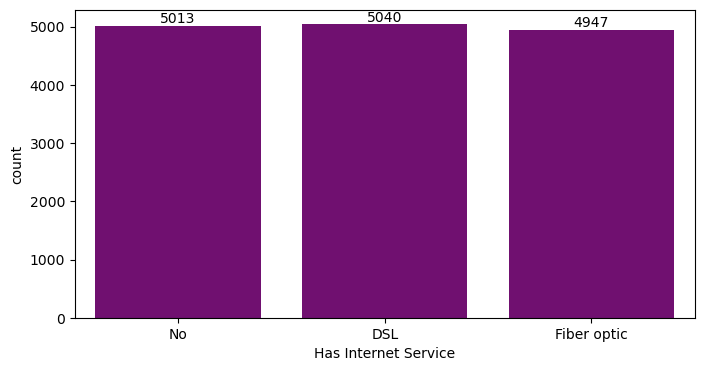

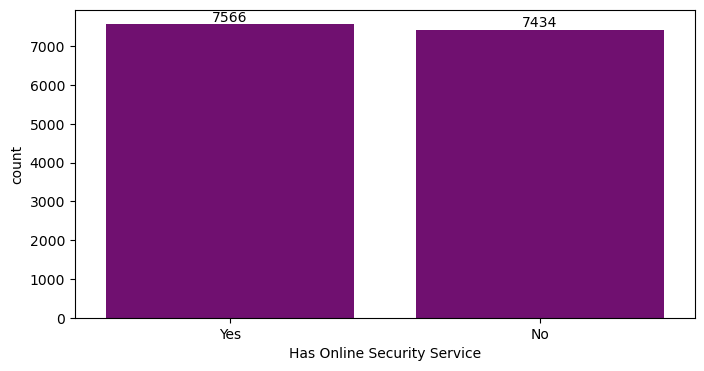

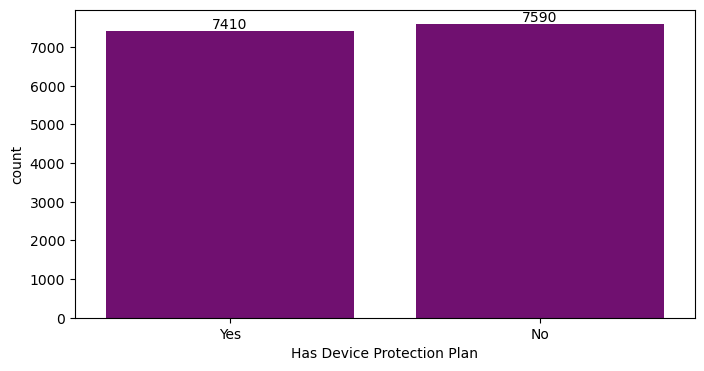

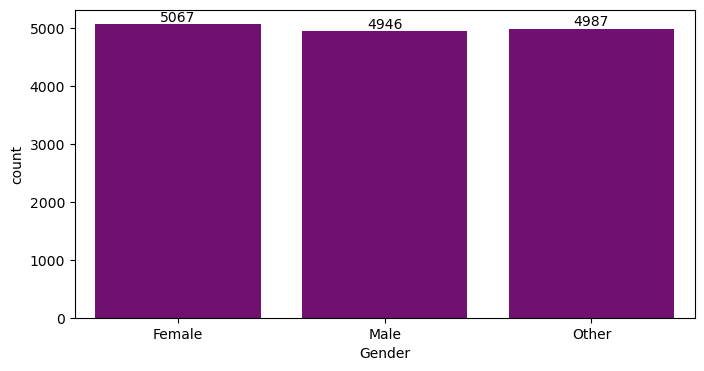

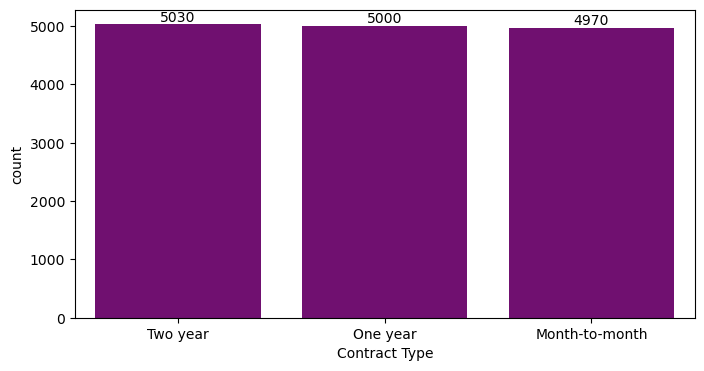

In [20]:
for cols in categorical_columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df,x=cols, color="purple")
    ax.bar_label(ax.containers[0])
plt.show()
                

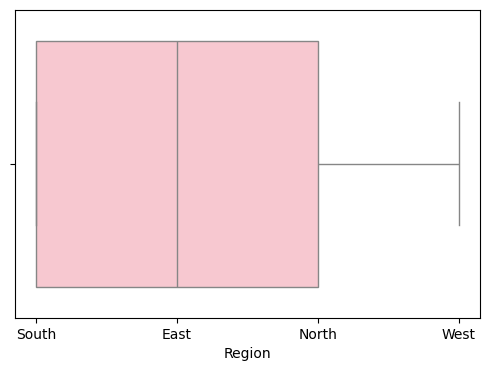

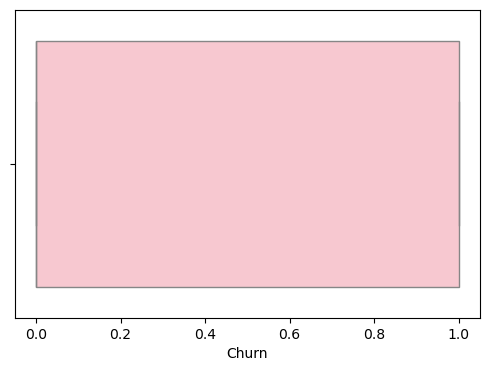

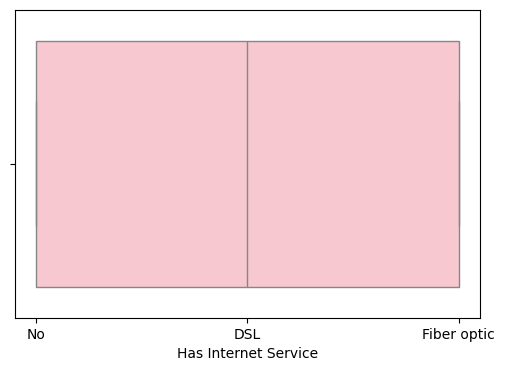

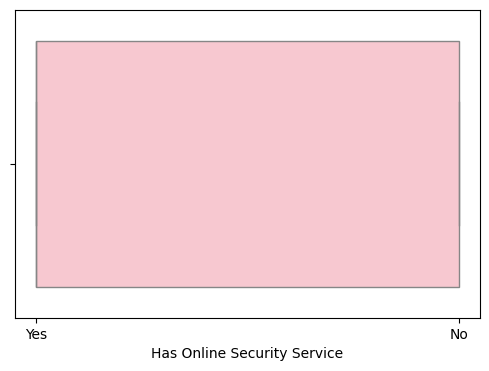

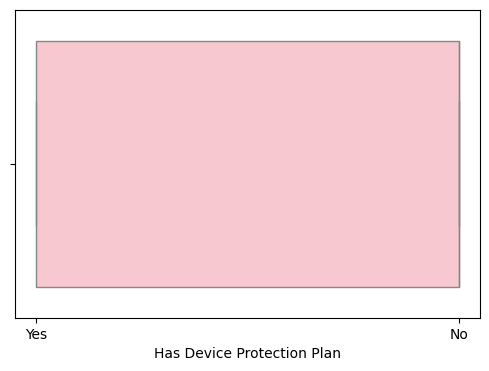

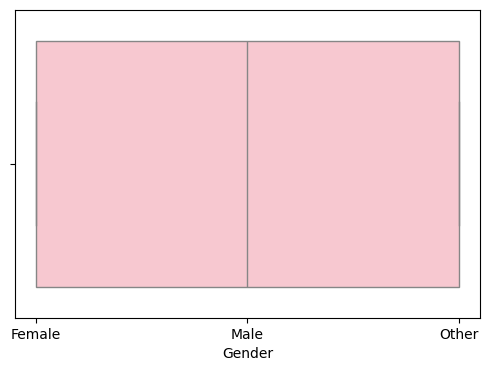

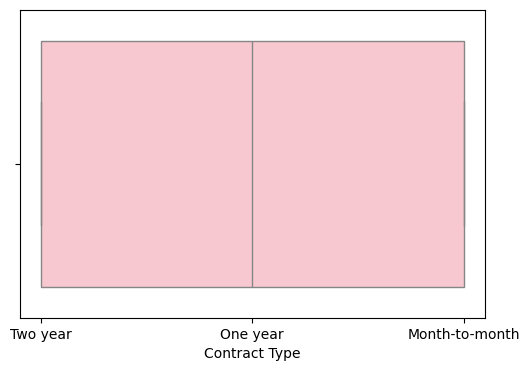

In [21]:
for cols in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df,x=cols,color="pink")
    plt.show()

observation -
1. count of customers from all regions are nearly equal.
2. count of not churn is greater than churn....so their is class imbalance in this data
3. count of has internet esrvice is nearly equal.
4. count of has online security service is nearly equal.
5. count of has device protection plan is nearly equal.
6. count of gender is nearly equal.
7. count of contract type is nearly equal.
8. Their are no outliers in categorical columns

### **Univariate Analysis of Numerical Columns**

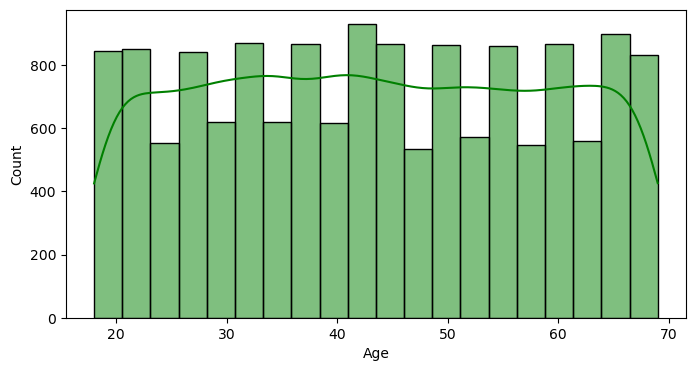

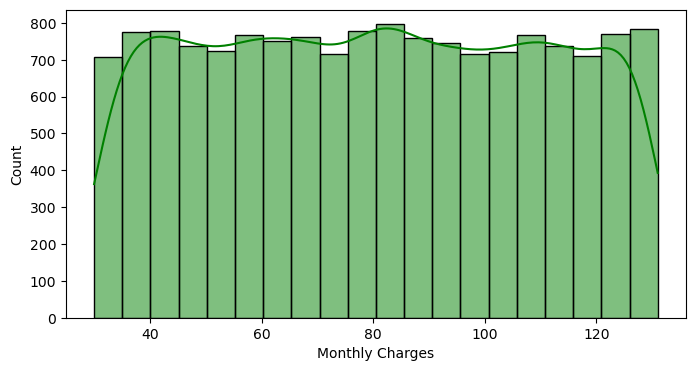

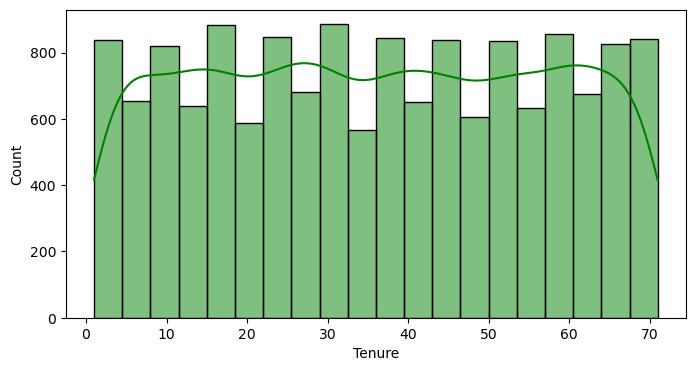

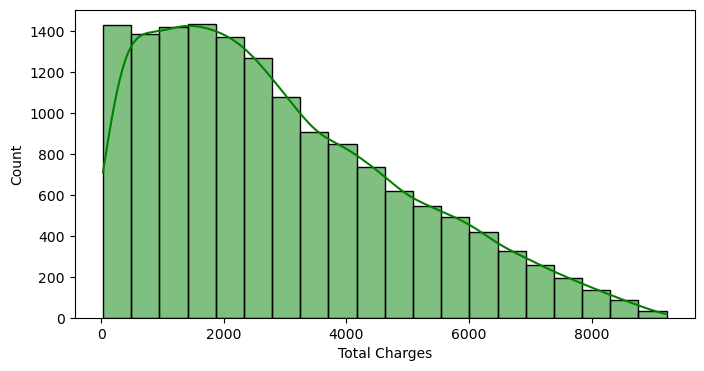

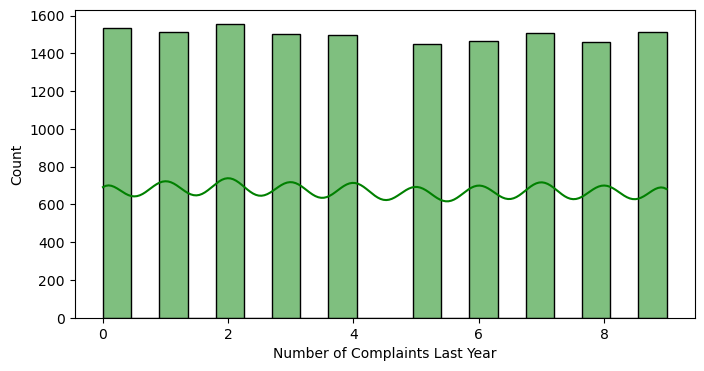

In [24]:
for cols in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df,x=cols,bins=20,kde=True,color="green")
    plt.show()

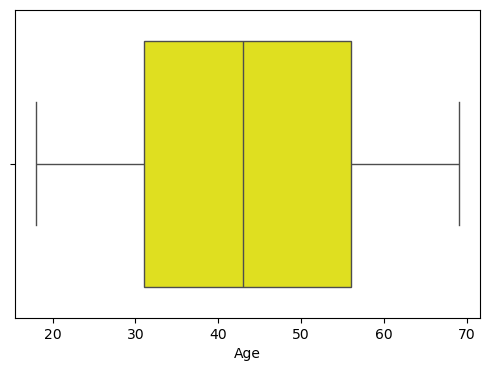

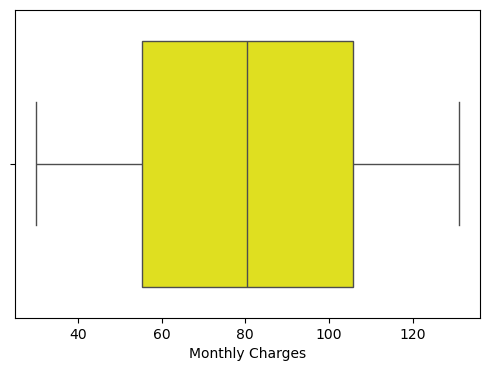

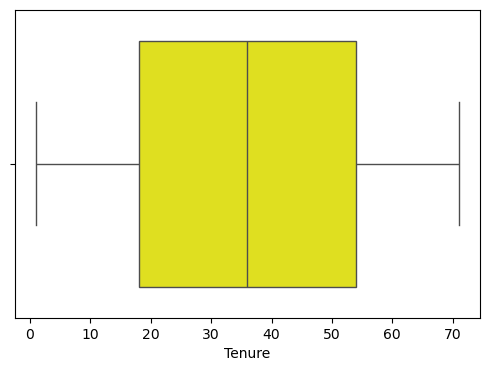

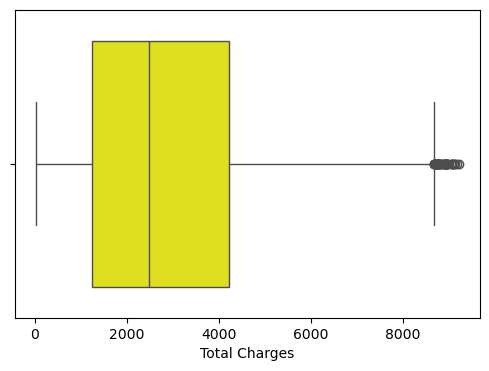

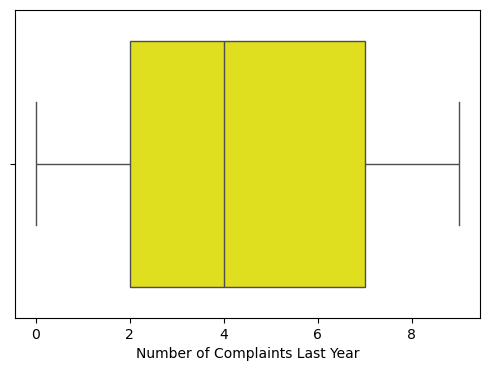

In [25]:
for cols in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df,x=cols,color="yellow")
    plt.show()

Observation -
1. Graph of total charges is positively skewed.
2. Some customers paid more than 8000 as total charges.

### **Bivariate Analysis on Categorical Columns**

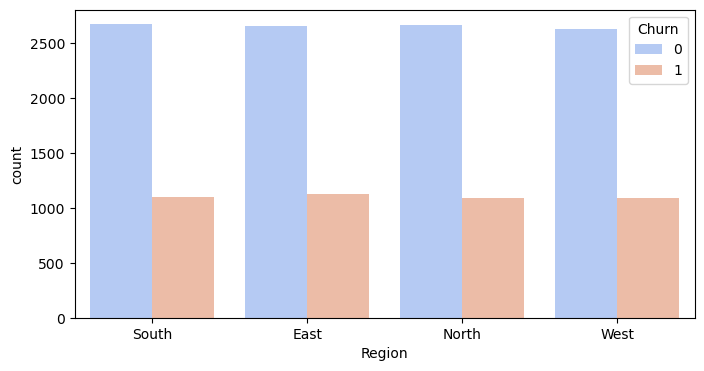

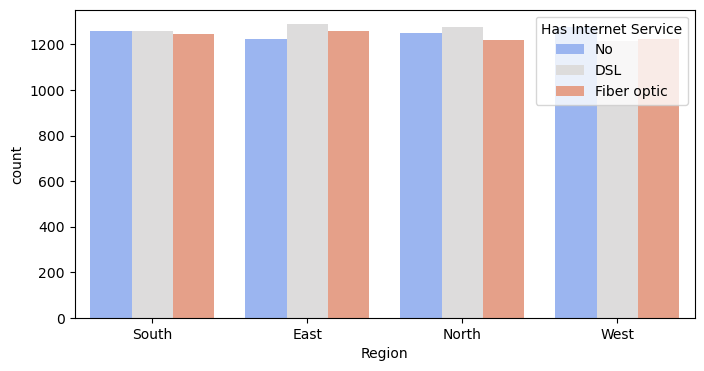

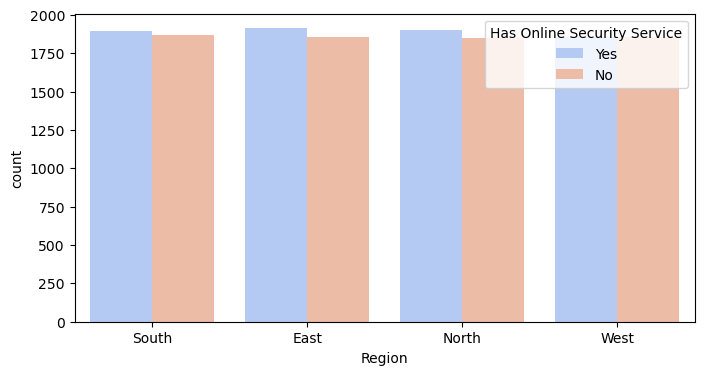

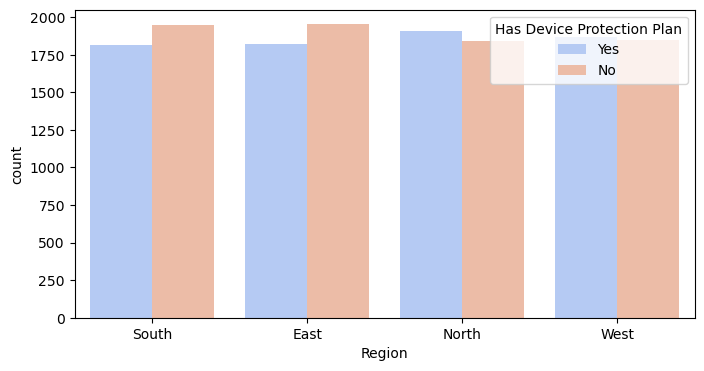

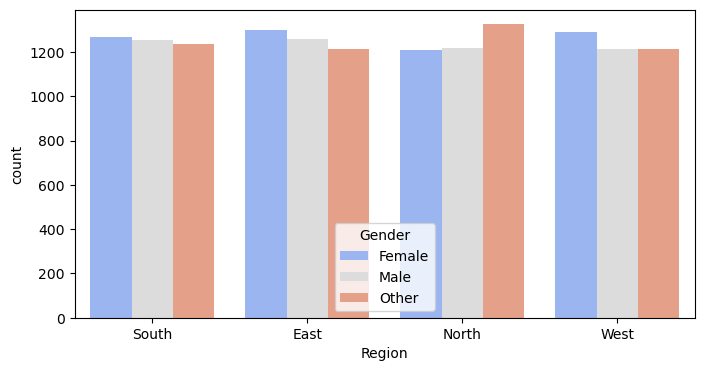

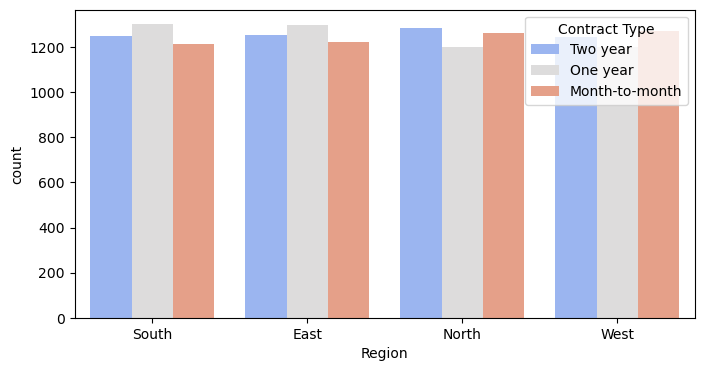

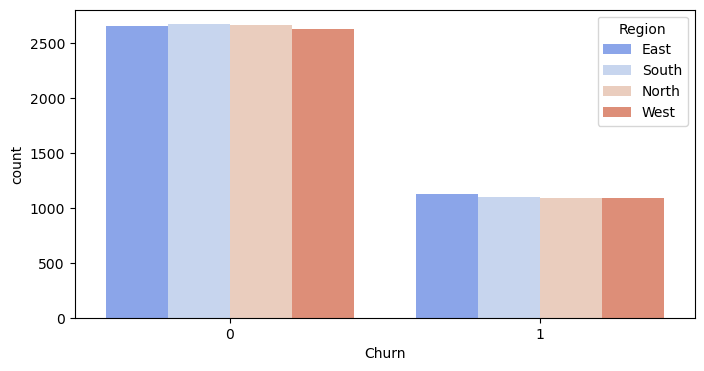

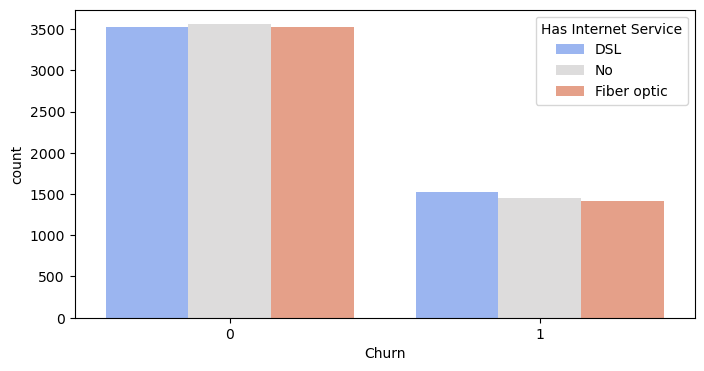

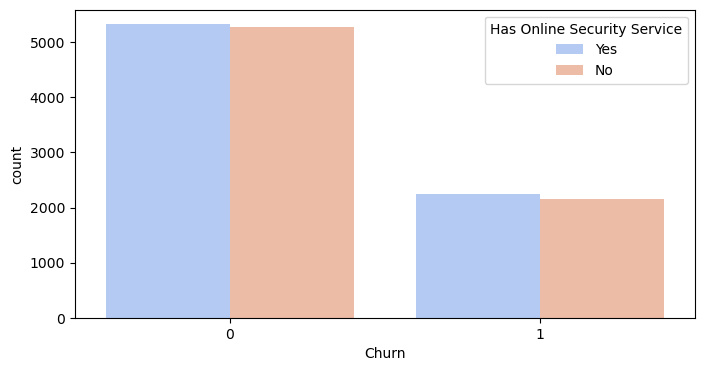

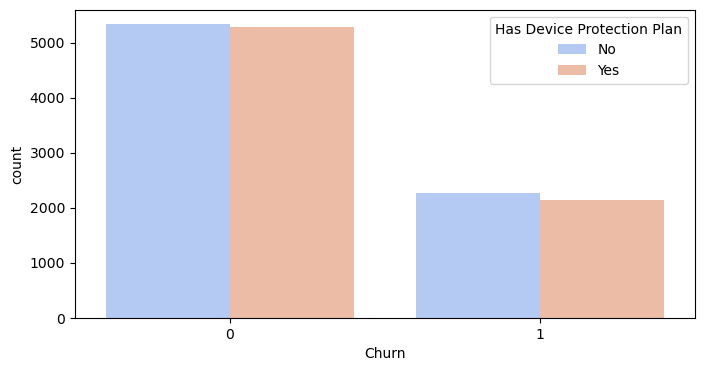

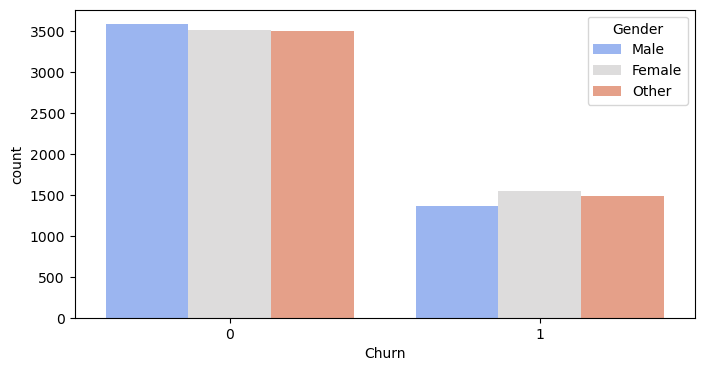

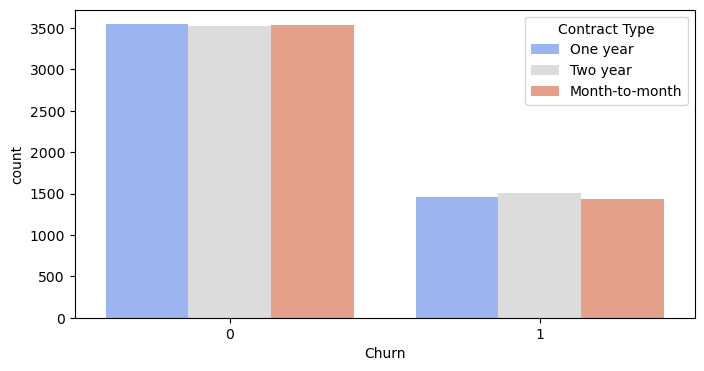

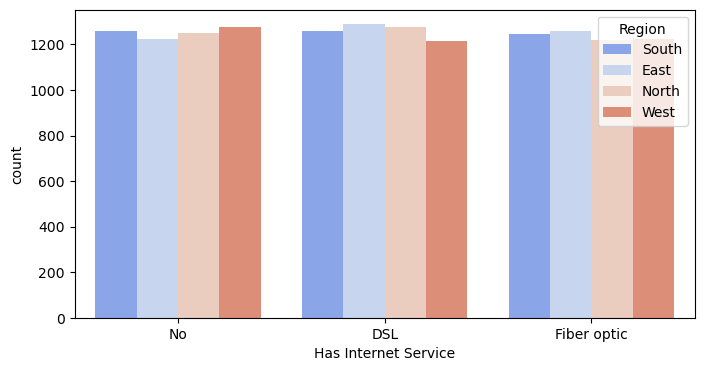

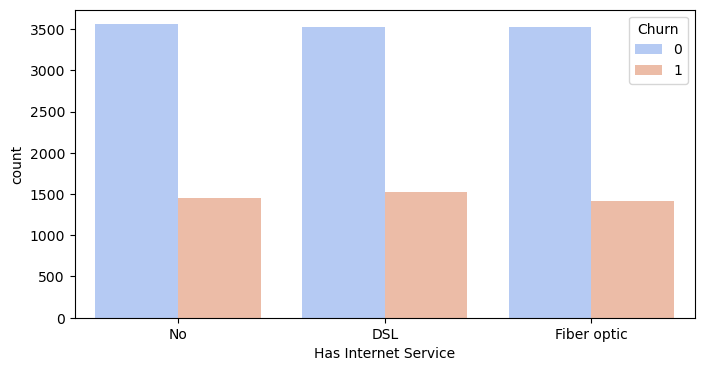

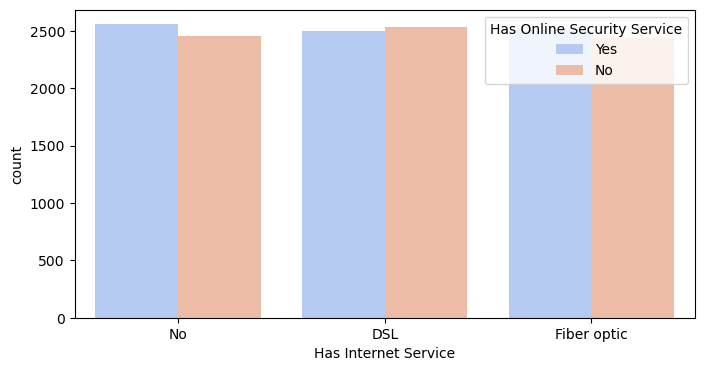

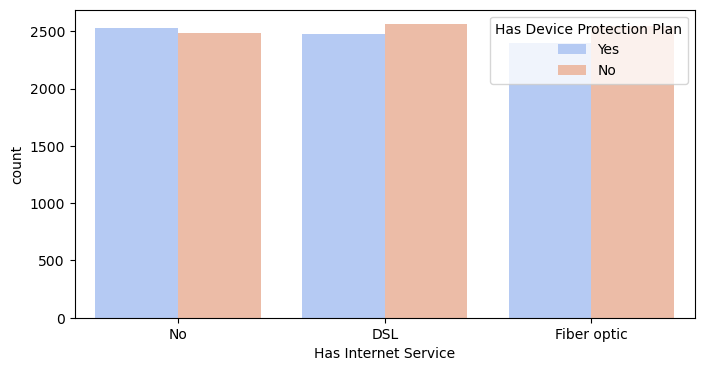

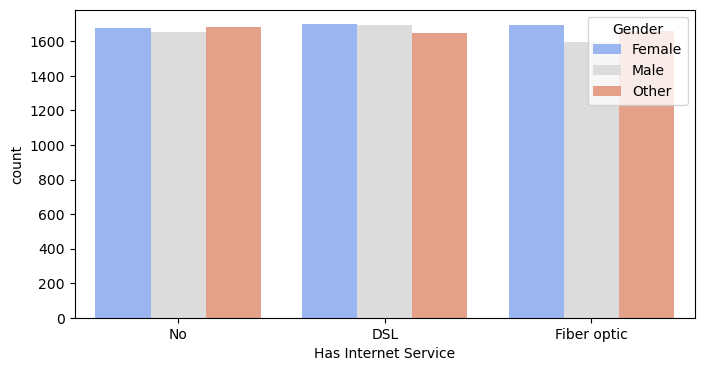

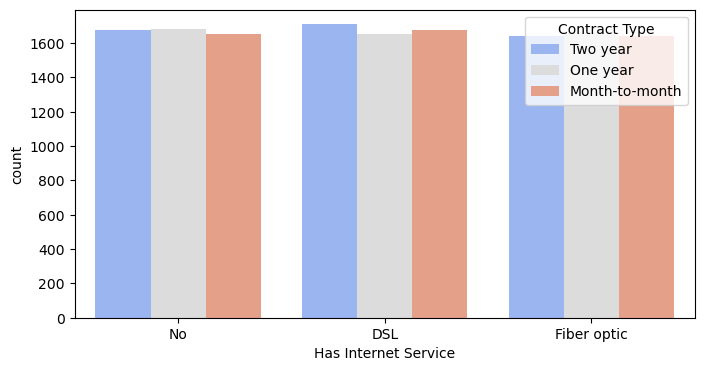

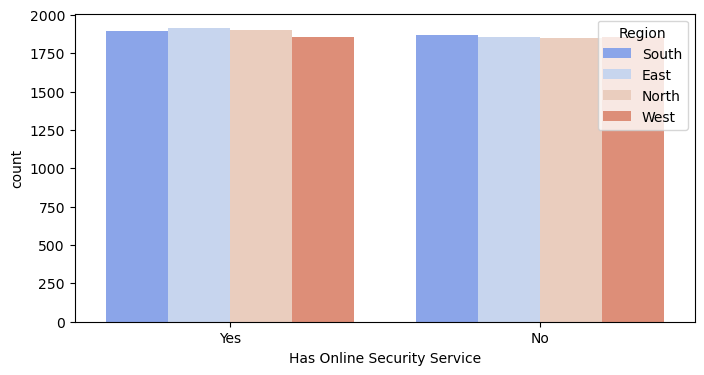

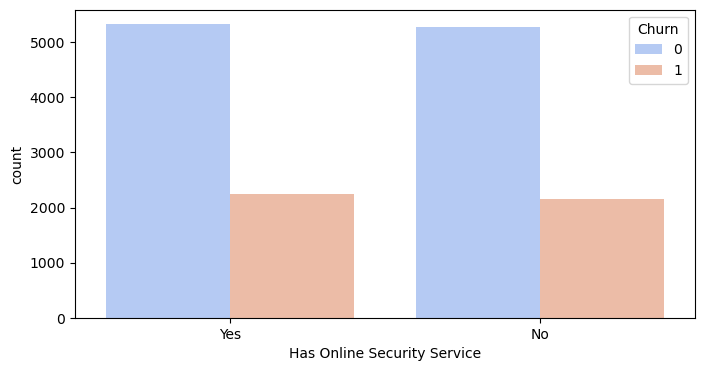

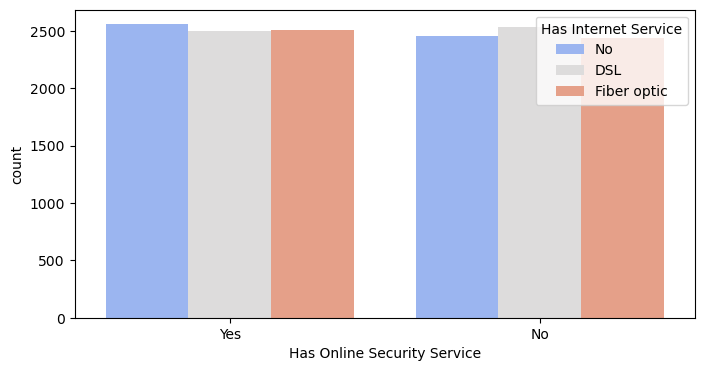

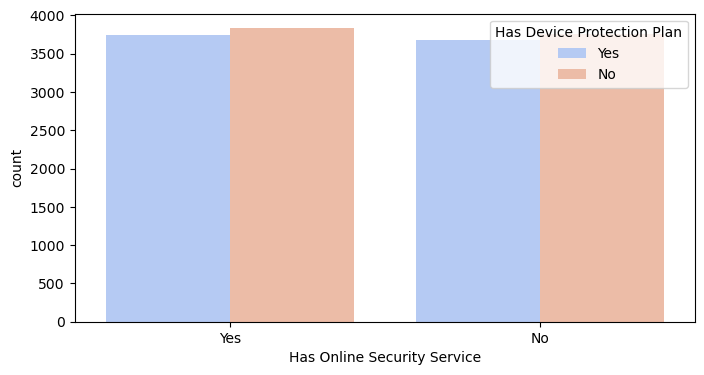

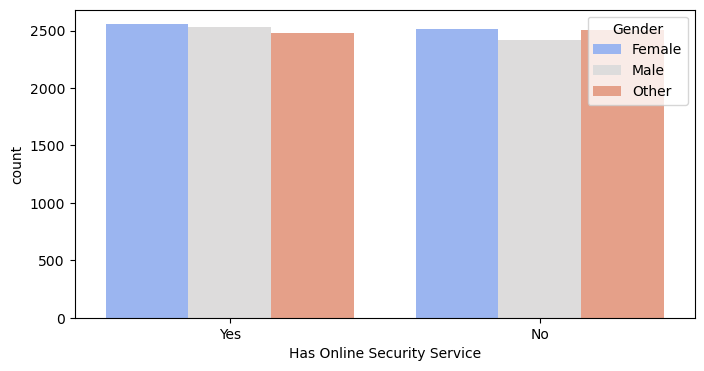

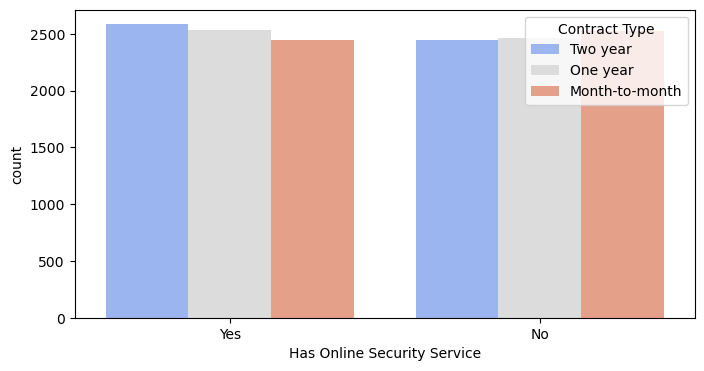

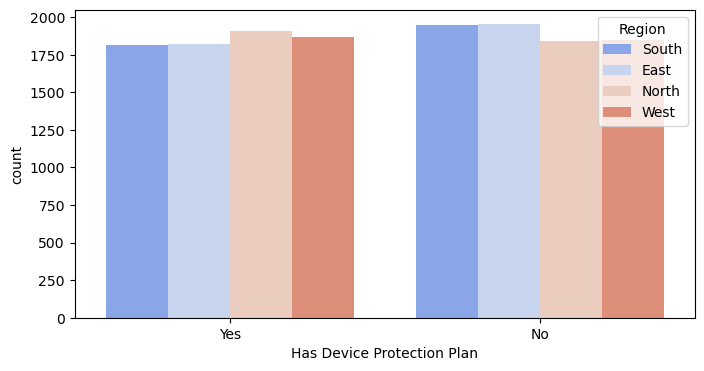

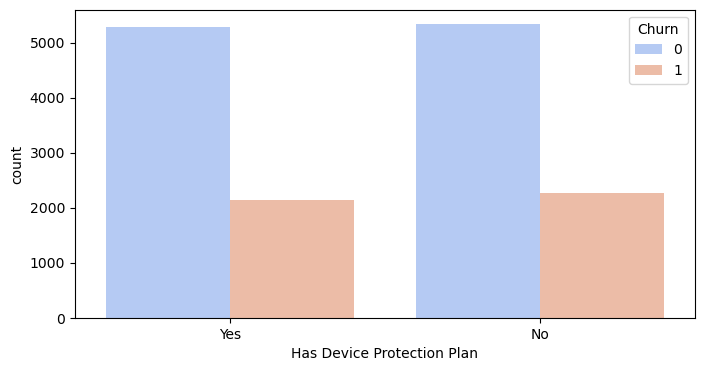

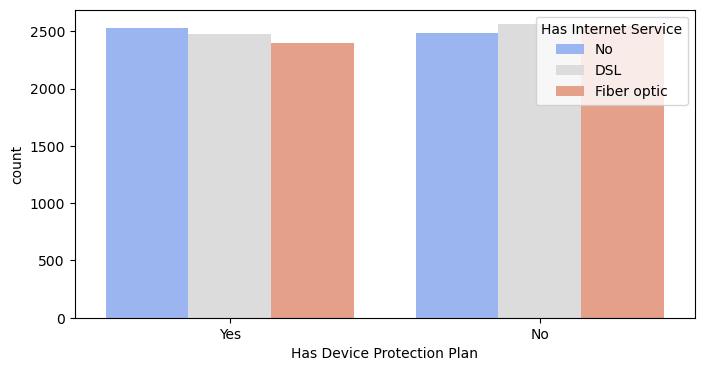

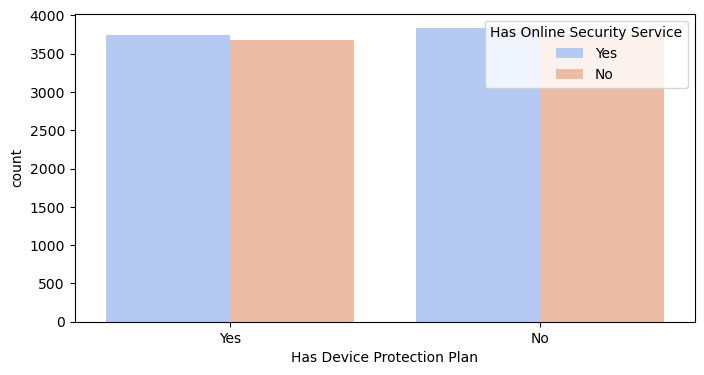

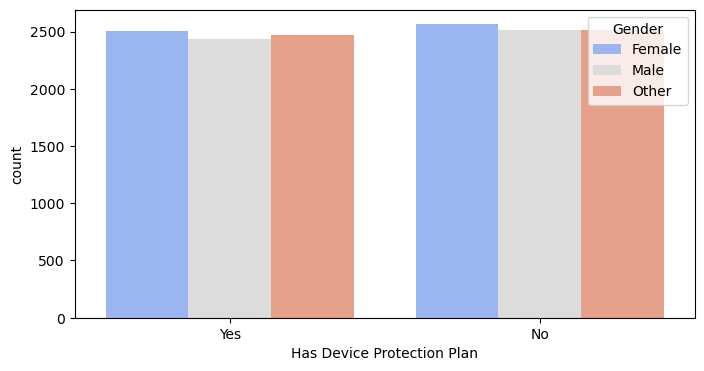

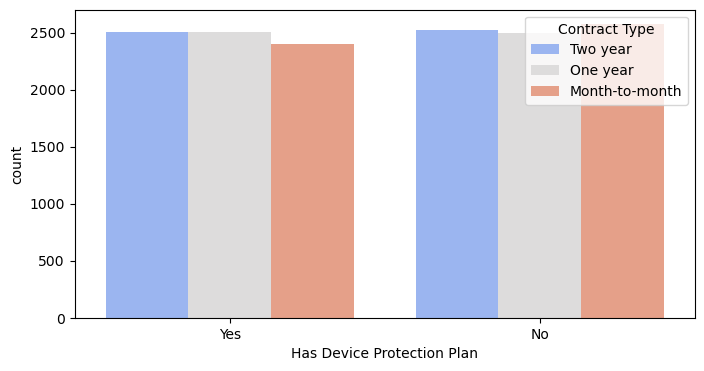

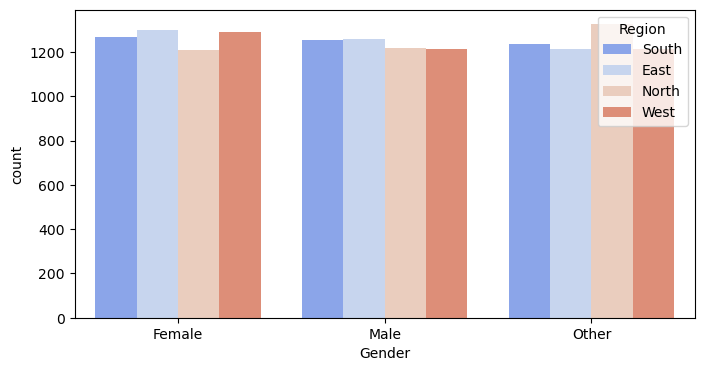

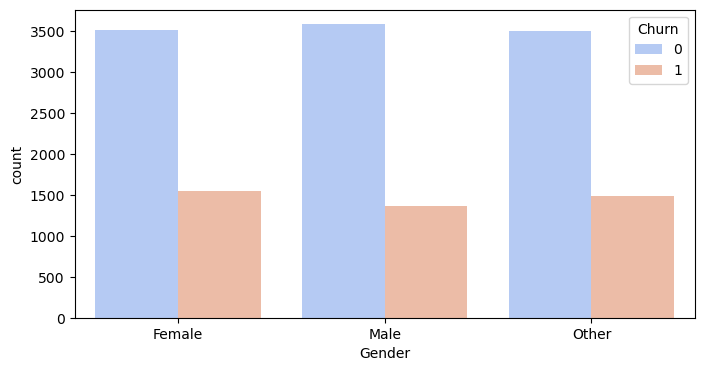

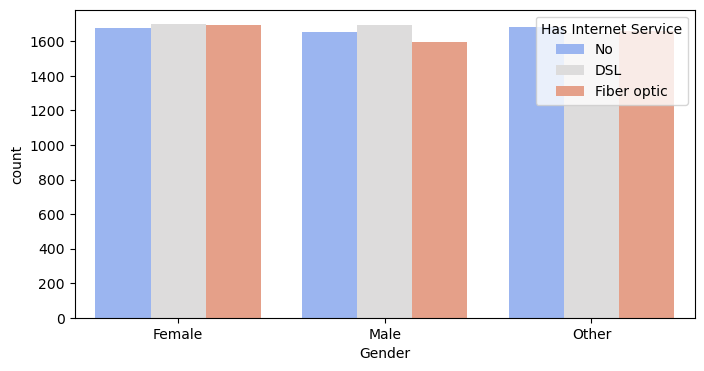

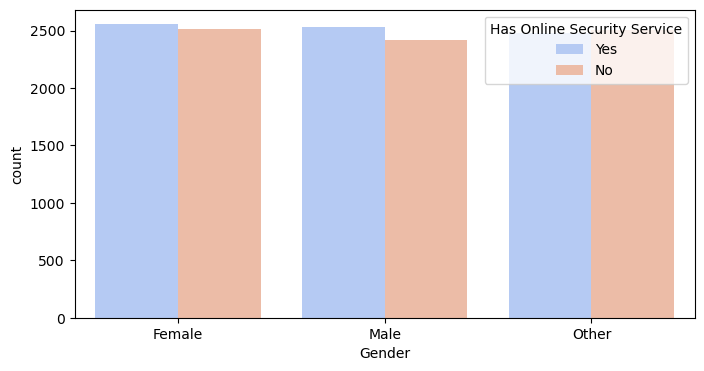

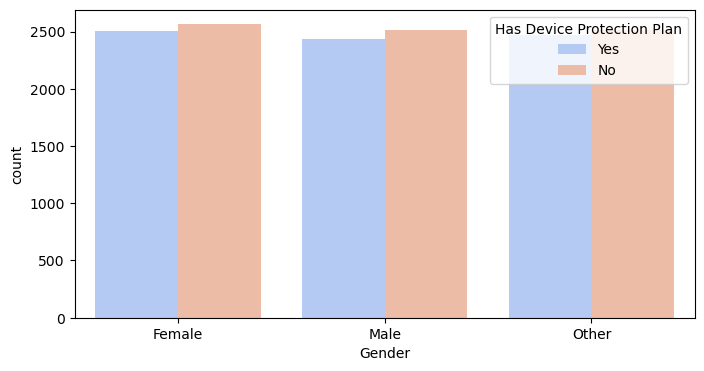

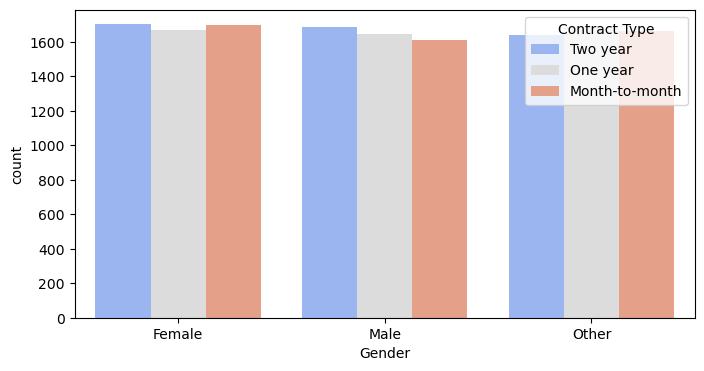

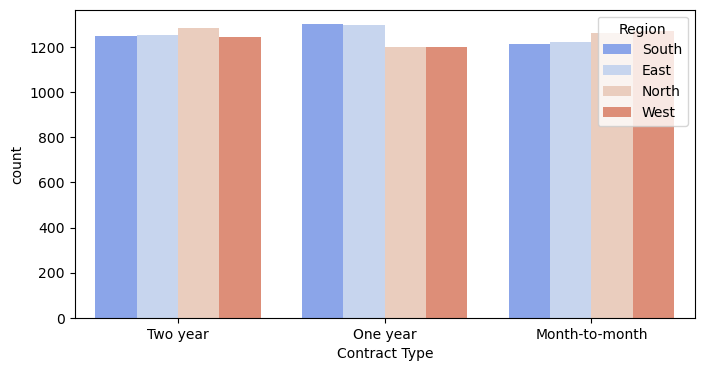

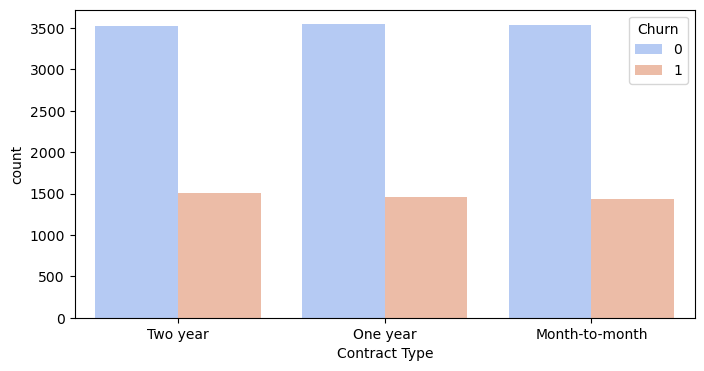

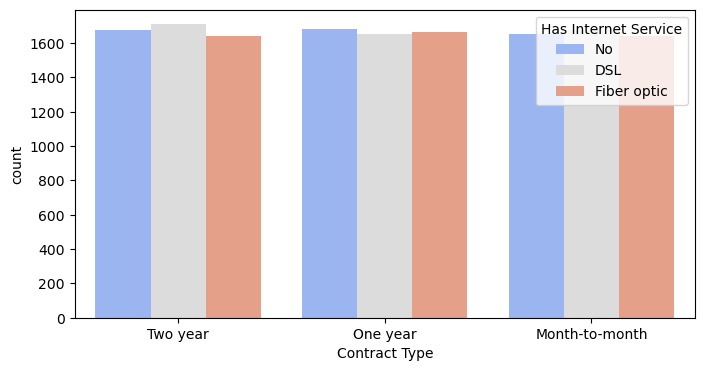

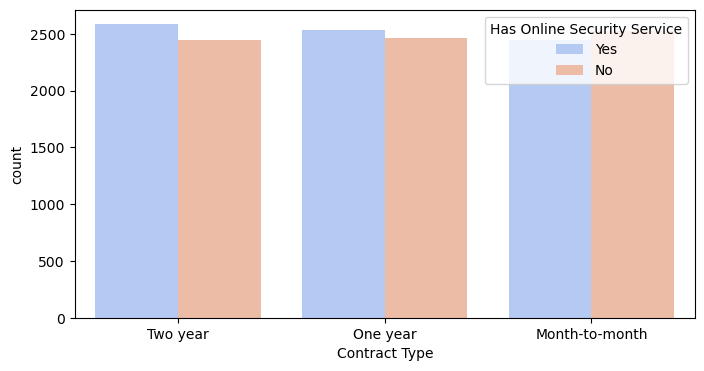

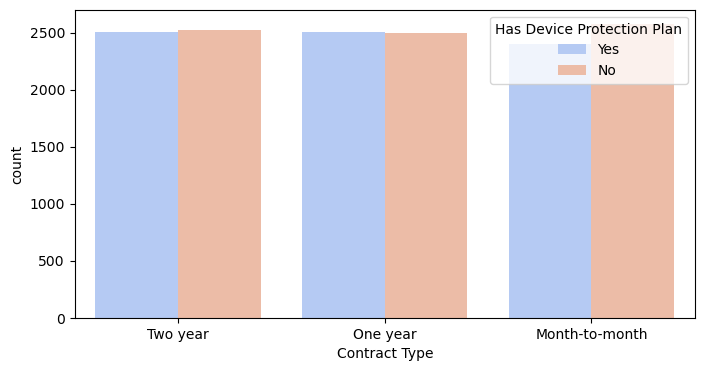

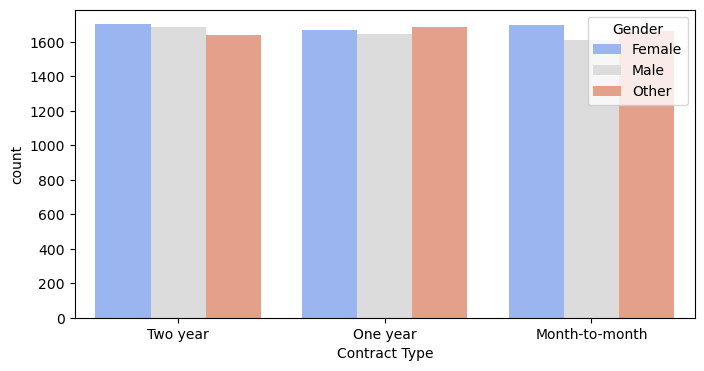

In [28]:
for cols in categorical_columns:
    for col in categorical_columns:
        if(cols!=col):
            plt.figure(figsize=(8,4))
            ax = sns.countplot(data=df,x=cols,hue=col,palette="coolwarm")
            plt.show()

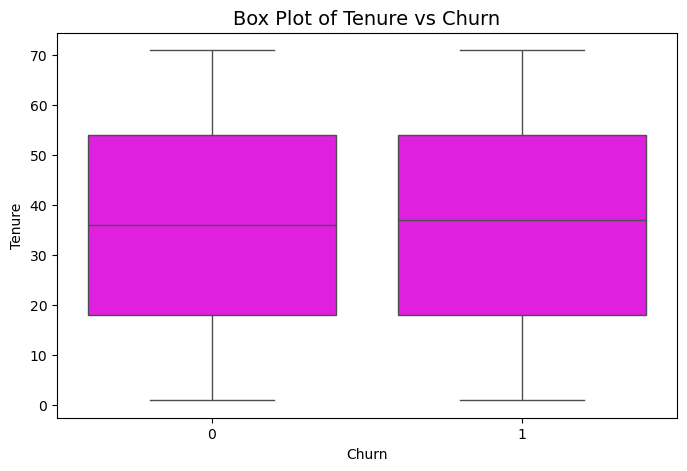

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Churn"], y=df["Tenure"],color="magenta")
plt.title("Box Plot of Tenure vs Churn", fontsize=14)
plt.show()


Observation - 
1. Churn from all region is nearly equal.
2. has internet service from all regions is nearly equal.
3. has online security service from all regions is nearly equal.
4. has device protection plan from all regions is nearly equal.

### **Categorical Columns vs Numerical Columns**

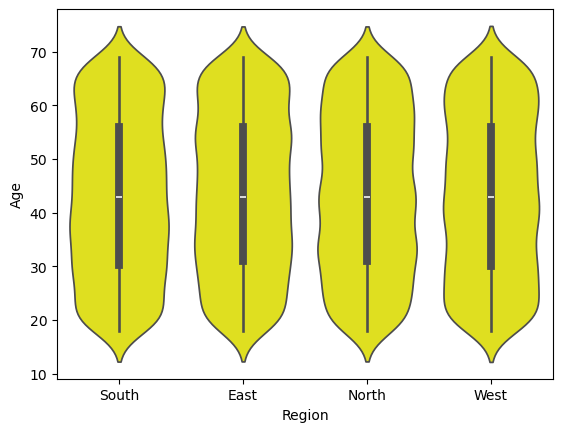

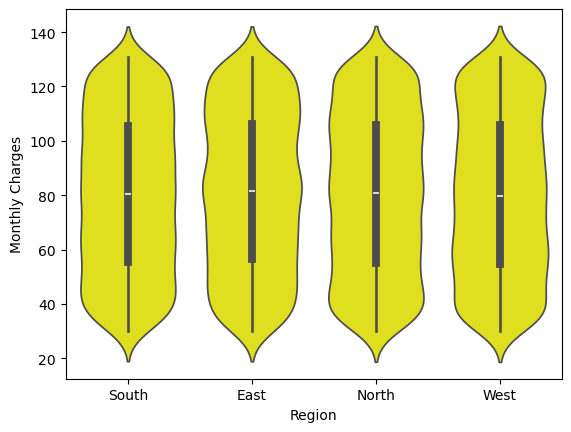

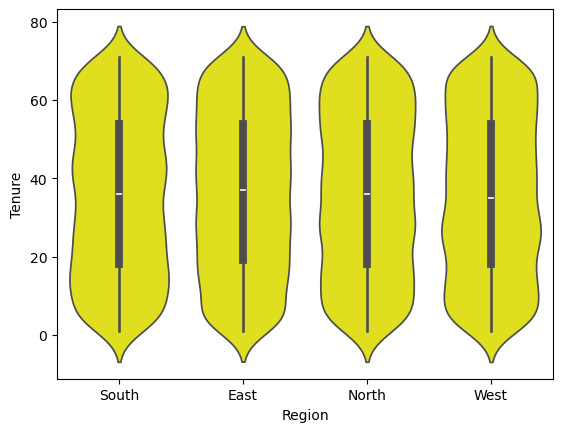

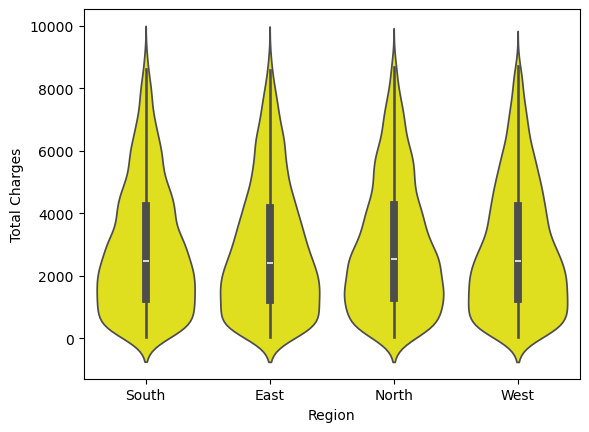

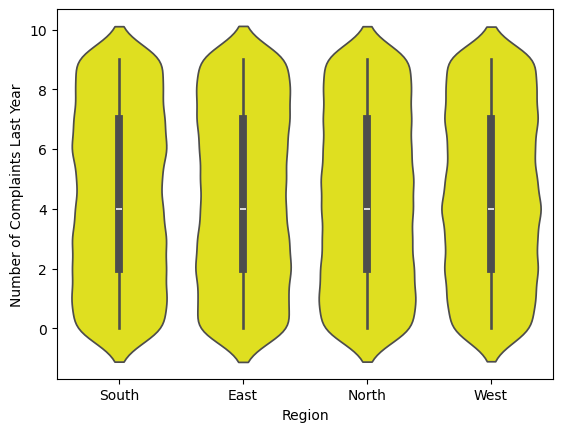

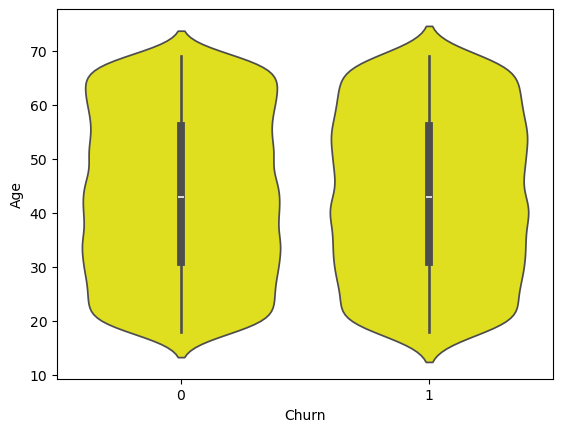

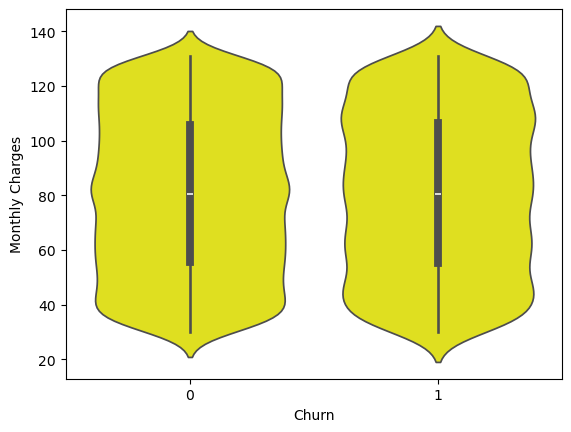

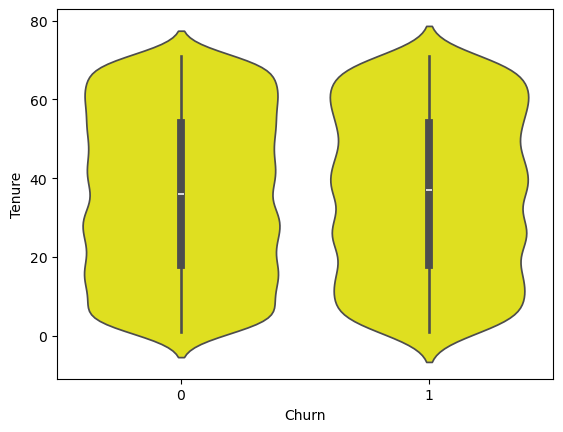

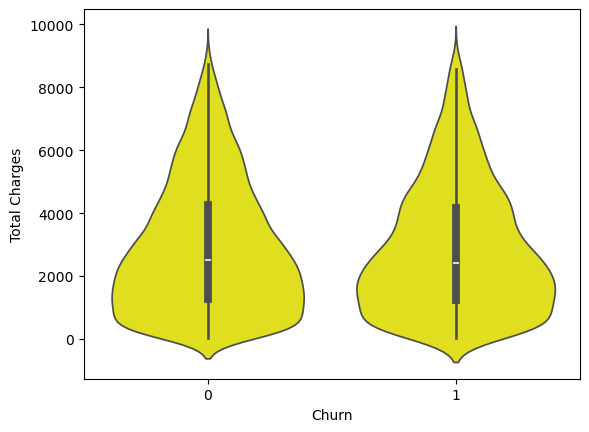

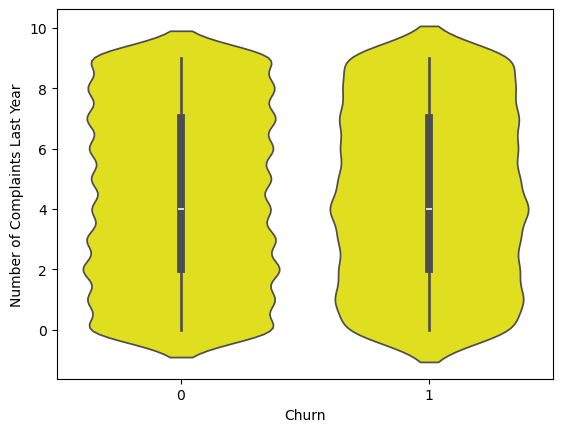

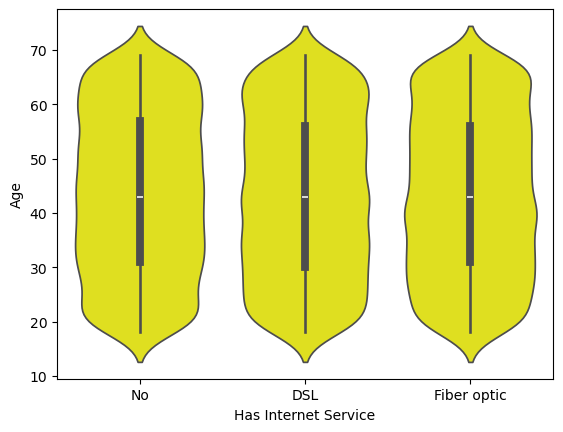

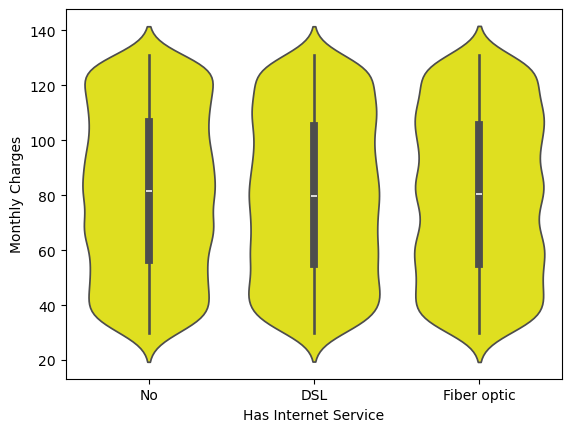

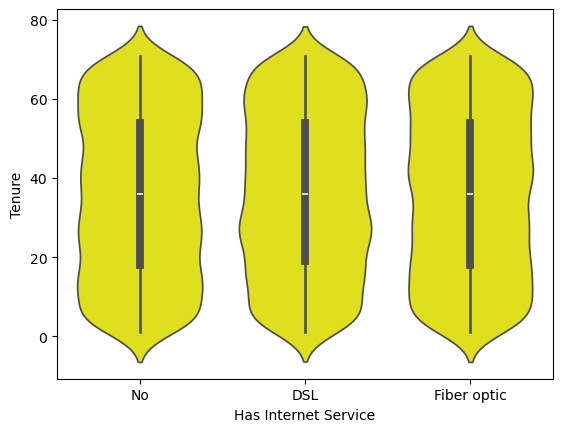

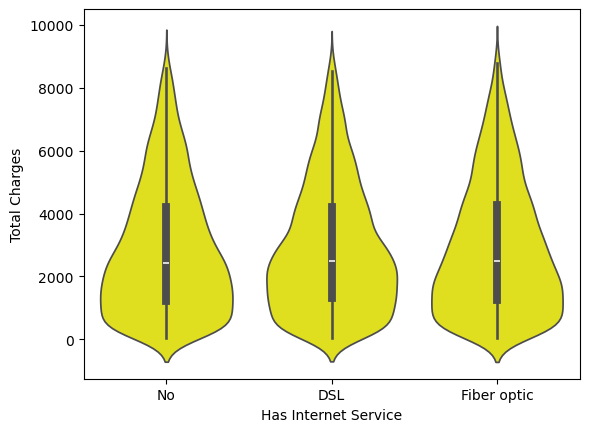

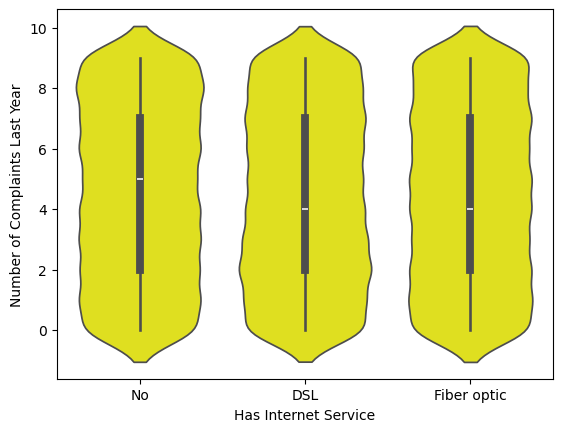

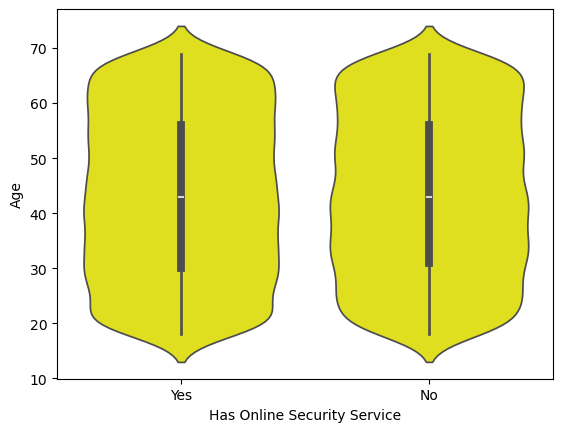

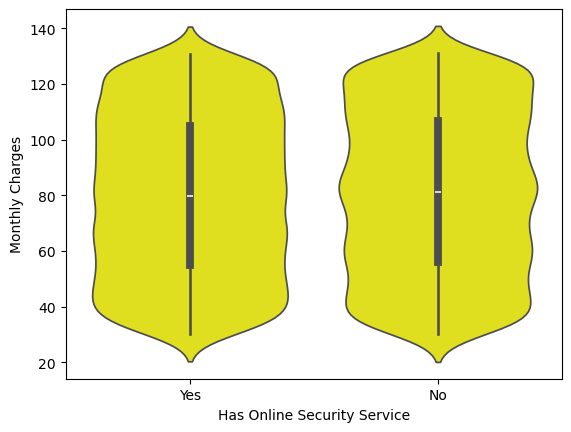

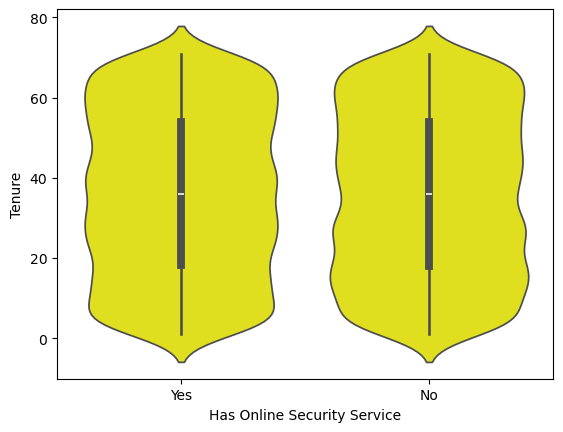

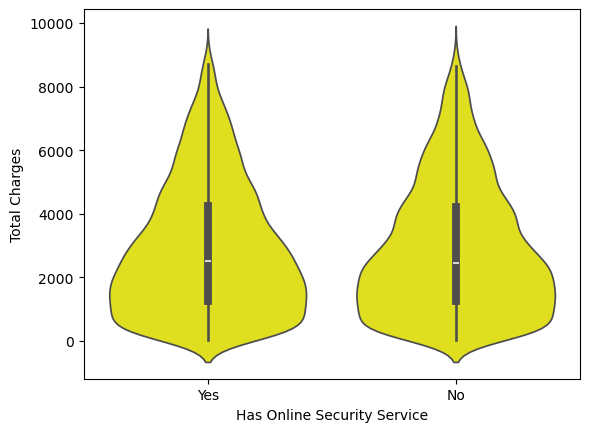

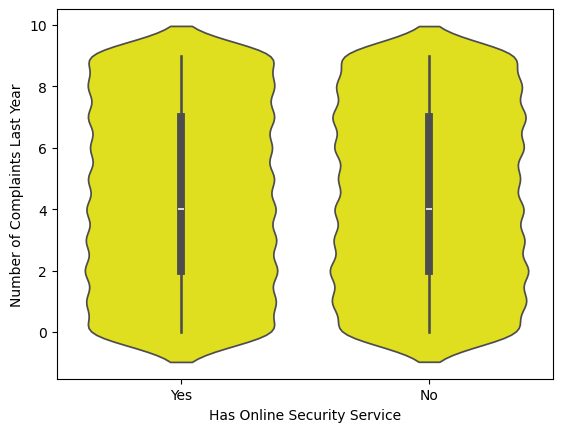

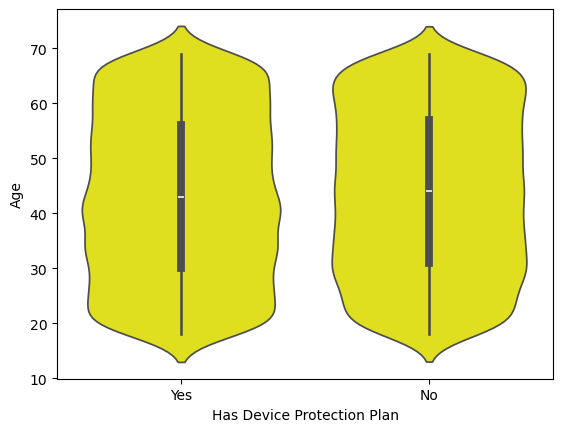

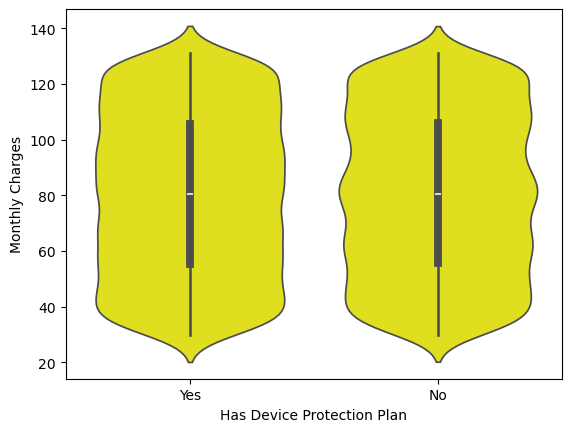

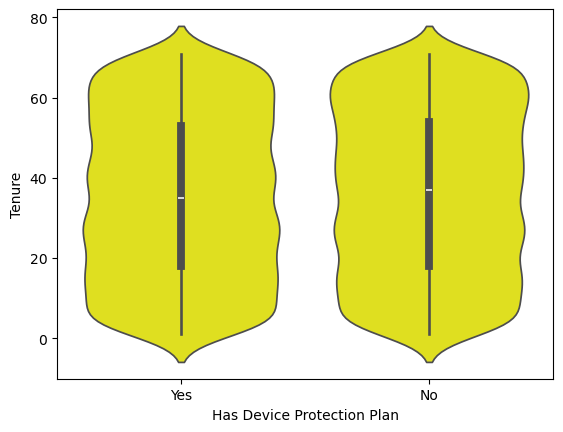

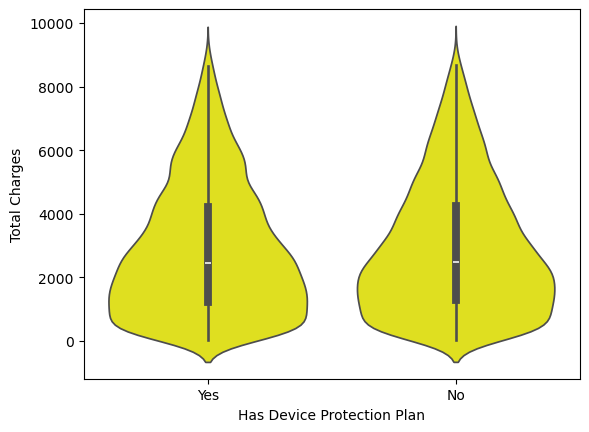

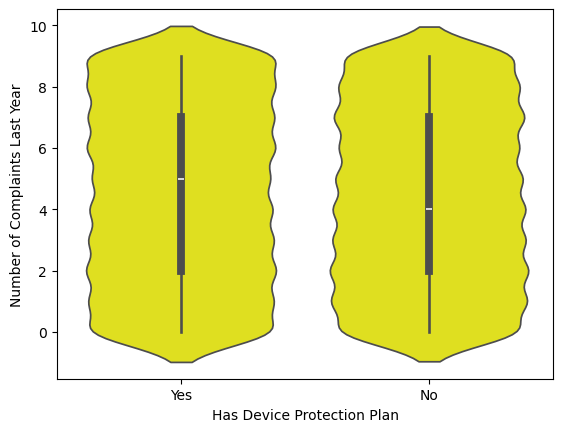

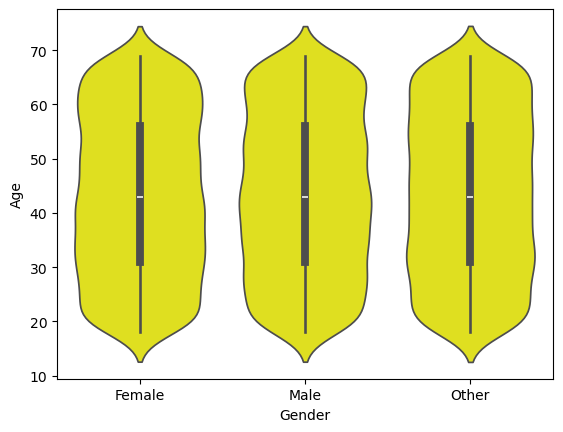

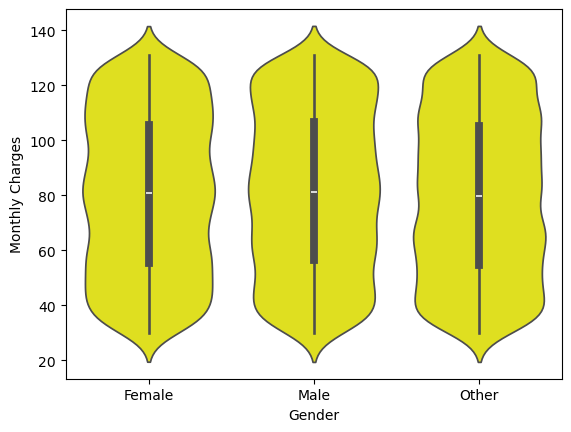

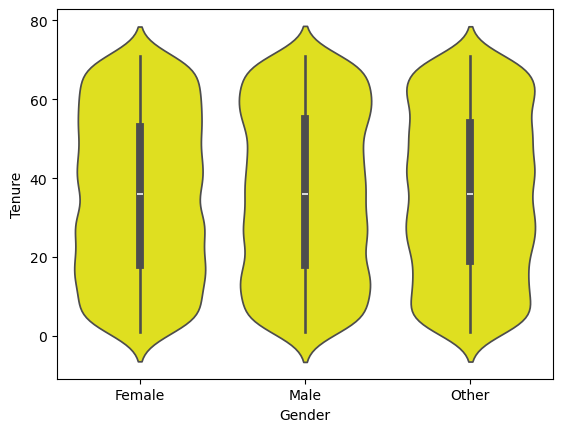

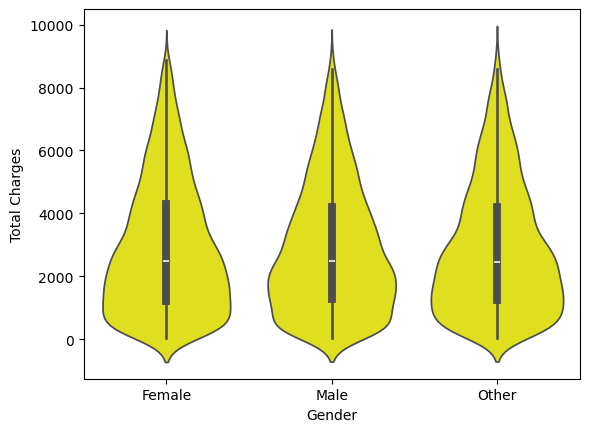

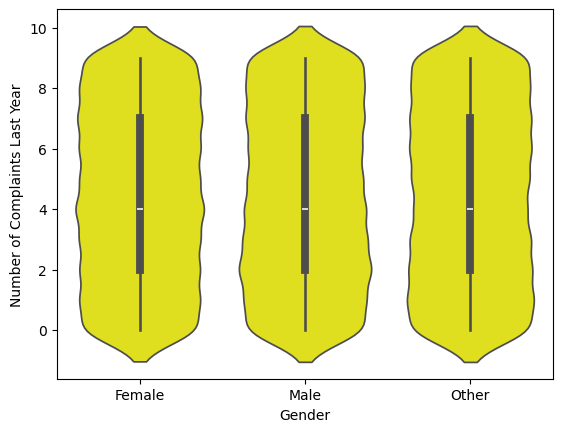

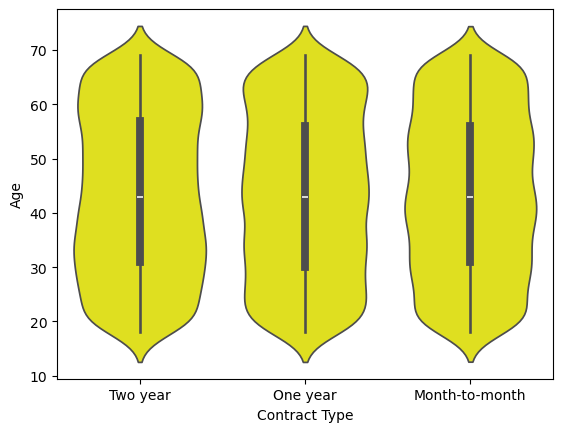

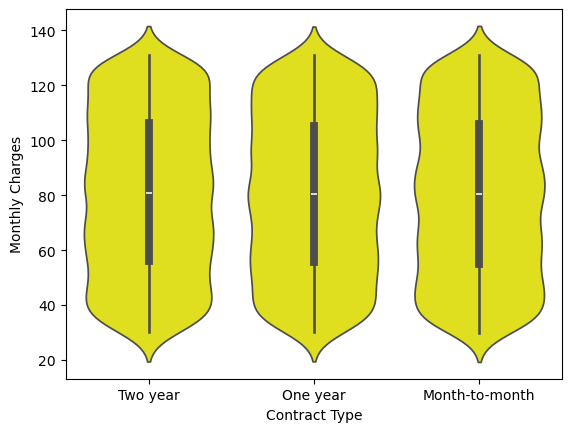

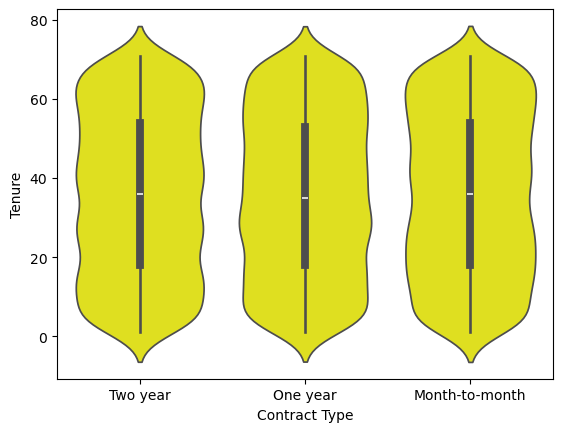

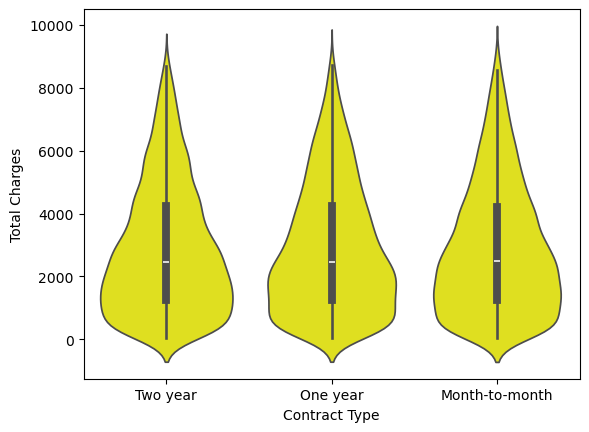

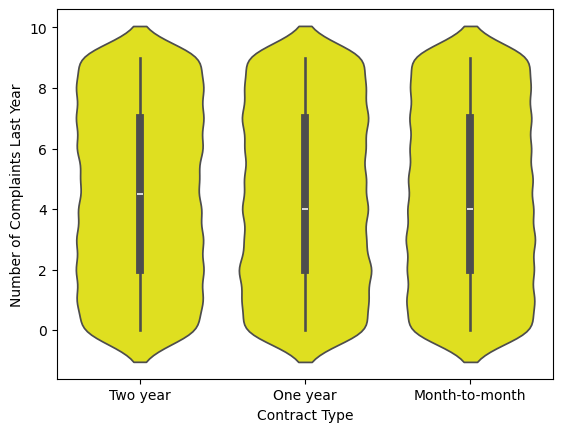

In [32]:
for col in categorical_columns:
    for cols in numerical_columns:
        sns.violinplot(x=col, y=cols, color="yellow",data=df)
        plt.show()



## **Label Encoding**

In [34]:
#encoding
from sklearn.preprocessing import LabelEncoder
df1 = df.copy()
categorical_columns = ['Region','Churn','Has Internet Service','Has Online Security Service', 'Has Device Protection Plan','Gender','Contract Type']
le = LabelEncoder()

for col in categorical_columns:
    df1[col]=le.fit_transform(df1[col])

In [35]:
df.head()

,CustomerID,Age,Gender,Tenure,Monthly Charges,Total Charges,Contract Type,Has Internet Service,Has Online Security Service,Has Device Protection Plan,Number of Complaints Last Year,Churn,Region
0,1,56,Female,41,78.22,5706.78,Two year,No,Yes,Yes,0,1,South
1,2,69,Male,55,120.48,790.58,One year,DSL,Yes,No,9,0,East
2,3,46,Female,7,90.26,3419.78,One year,No,No,Yes,8,0,South
3,4,32,Male,18,74.50,806.20,Two year,DSL,No,No,4,0,South
4,5,60,Female,43,46.38,1568.84,Month-to-month,Fiber optic,No,Yes,5,0,North


In [36]:
from sklearn.preprocessing import StandardScaler
numerical_features = ["Age","Tenure","Monthly Charges","Total Charges","Contract Type","Has Internet Service","Has Device Protection Plan","Region"]
scaler = StandardScaler()
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

### Correlation Matrix

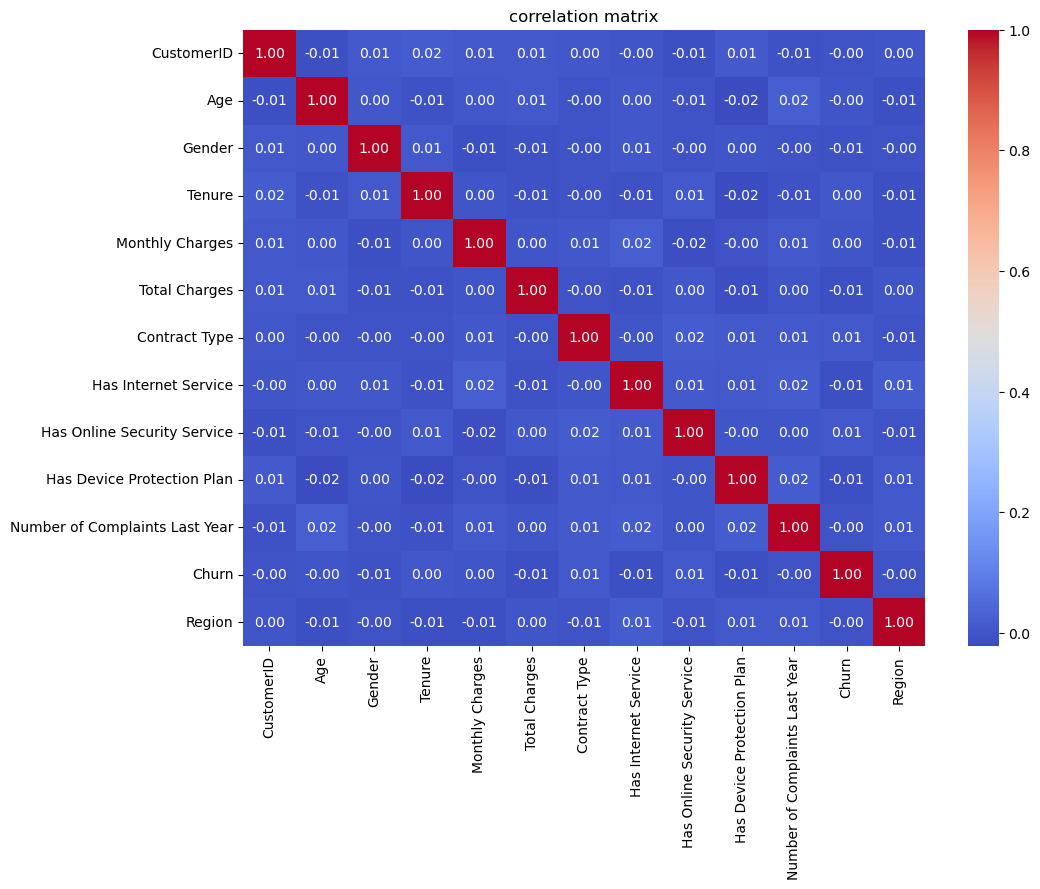

In [38]:
corr_mat = df1.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr_mat,annot=True,cmap="coolwarm", fmt='.2f')
plt.title("correlation matrix")
plt.show()

Observation -

 **1. Mostly Low Correlation**
 
 **2. No strong correlation is visible between "Churn" and other factors.**

### **Handling Class Imbalance with Random Over Sampling**

In [41]:
X = df1.drop(columns=["Churn"])  
y = df1["Churn"]  
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["C"] = y_resampled 
df_resampled.to_csv("balanced_dataset.csv", index=False)
print("Balanced dataset saved successfully!")


[(0, 10607), (1, 10607)]
Balanced dataset saved successfully!


In [42]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_resampled,x="Churn")
plt.show()

ValueError: Could not interpret value `Churn` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [ ]:
df_resampled